In [1]:
import os
import time
import numpy as np
import pandas as pd

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit, RandomizedSearchCV, RandomizedSearchCV, KFold,train_test_split, StratifiedShuffleSplit
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import linear_model
from xgboost.sklearn import XGBRegressor

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

%matplotlib inline
init_notebook_mode(connected=True)

In [4]:
import xgboost as xgb

In [5]:
from sklearn import metrics

In [131]:
def closest2(number):
    return min([270, 300, 285, 215], key=lambda x:abs(x-number))

In [6]:
def rmsle(h, y):
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

In [7]:
def test(X,y):
    # when labels are in [0,1] we can also use reg:logistic
    # Create a parameter grid to search for best parameters for everything in the pipeline
    param_grid = {
                    #'min_child_weight': [0.01,0.05,0.1, 0.5,1,1.5,2], # due to high class imbalance
                    'objective': ['reg:linear'],
                    'max_depth': [1,2,3,4,5,6,7,8,10,20],
                    'nthread': [12],
                    #'max_delta_step': [1.8],
                    #'colsample_bytree': [0.4],
                    'subsample': [0.9],
                    'learning_rate': [0.35,0.4,0.45,0.25,0.5,0.55,0.3], #0.025
                    'gamma': [i/10.0 for i in range(0,10)],
                    'n_estimators' : [250],
                    #'tree_method': ['gpu_hist'],
                    'silent': [1],
                    'missing':[-999],
                    'n_jobs': [12],
                    #'updater': 'grow_gpu',
                    #'scale_pos_weight' : [0.5,1,1.5] # due to high class imbalance
                  }

    # Normalized Gini Scorer
    rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

    # Initialize Grid Search Model
    model = RandomizedSearchCV(estimator  = XGBRegressor(),
                               param_distributions = param_grid,
                               n_iter = 50,
                               #param_grid = param_grid,
                               scoring    = rmsle_scorer,
                               verbose    = 2,
                               n_jobs     = 12,
                               iid        = True,
                               refit      = True,
                               cv         = ShuffleSplit(n_splits=5, test_size=.2))
    # Fit Grid Search Model
    model.fit(X, y)
    print("Best score: %0.3f" % model.best_score_)
    print("Best parameters set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

    # Get best model
    best_model = model.best_estimator_

    # Fit model with best parameters optimized for normalized_gini
    #best_model.fit(train,labels)

    return best_model, model

In [182]:
df_train = pd.read_csv("../data/train_additional.csv")

In [183]:
features = list(set(df_train.columns.tolist()) - set(['formation_energy_ev_natom',
                                                'bandgap_energy_ev', 
                                                'id',
                                                'lattice_angle_alpha_degree_r',
                                                'lattice_angle_beta_degree_r',
                                                'lattice_angle_alpha_degree_r']))
targets = ['formation_energy_ev_natom', 'bandgap_energy_ev']

y_e = df_train['formation_energy_ev_natom']
y_be = df_train['bandgap_energy_ev']

X = df_train[features]

In [184]:
dist_features = [x for x in df_train.columns.tolist() if x.startswith('dist')]
path_features = [x for x in df_train.columns.tolist() if x.startswith('path')]
angle_features = [x for x in df_train.columns.tolist() if x.startswith('angle')]
dihedral_features = [x for x in df_train.columns.tolist() if x.startswith('dihedral')]
percent_features = [x for x in df_train.columns.tolist() if x.startswith('percent')]
avg_features = [x for x in df_train.columns.tolist() if x.startswith('avg')]
lattice_angle_features = [x for x in df_train.columns.tolist() if x.startswith('lattice_angle')]

In [185]:
feature_engineering =['avg_IP',
                     'avg_rd_max',
                     'avg_LUMO',
                     'avg_electronegativity',
                     'avg_rp_max',
                     'percent_atom_in',
                     'percent_atom_al',
                     'percent_atom_ga',
                     'dist_23',
                     'dist_25',
                     'dist_16',
                     'dist_46',
                     'dist_15',
                     'dist_40',
                     'dist_33',
                     'dist_29',
                     'dist_18',
                     'dist_8',
                     'dist_77',
                     'dist_65',
                     'dist_47',
                     'dist_20',
                     'dist_30',
                     'dist_49',
                     'path_30',
                     'path_20',
                     'path_10',
                     'path_0',
                     'path_40',
                     'path_49',
                     'angle_179',
                     'angle_86',
                     'angle_169',
                     'angle_171',
                     'angle_95',
                     'angle_93',
                     'angle_121',
                     'angle_89',
                     'angle_108',
                     'angle_91',
                     'angle_165',
                     'dihedral_75',
                     'dihedral_154',
                     'dihedral_66',
                     'dihedral_7',
                     'dihedral_178',
                     'dihedral_97',
                     'dihedral_85',
                     'dihedral_131',
                     'dihedral_24',
                     'dihedral_91',
                     'dihedral_135',
                     'dihedral_79',
                     'dihedral_177',
                     'dihedral_119',
                     'dihedral_2',
                     'A_8',
                     'A_5',
                     'A_3',
                     'A_2',
                     'A_0',
                     'A_7',
                     'A_6',
                     'A_1',
                     'A_4',
                     'B_8',
                     'B_6',
                     'B_5',
                     'B_2',
                     'B_3',
                     'B_1',
                     'B_0',
                     'B_7',
                     'B_4',
                     'R_1',
                     'R_2',
                     'R_0',
                     'r_2',
                     'r_1',
                     'r_0',
                     'lattice_angle_sum_discrete_215',
                     'lattice_angle_sum_discrete_270',
                     'lattice_angle_sum_discrete_285',
                     'lattice_angle_sum_discrete_300']

In [223]:
df_train['lattice_angle_sum'] = df_train[['lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree']].sum(axis=1)

In [224]:
df_train['lattice_angle_sum'] = df_train[['lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree']].sum(axis=1)
df_train['lattice_angle_sum_discrete'] = df_train['lattice_angle_sum'].apply(closest2)
dummy_df = pd.get_dummies(df_train['lattice_angle_sum_discrete'], prefix='lattice_angle_sum_discrete')
pd.concat([dummy_df, df_train], axis=1)

In [225]:
df_train['lattice_angle_sum_discrete'].head()

0    270
1    300
2    215
3    300
4    300
Name: lattice_angle_sum_discrete, dtype: int64

In [226]:
dummy_df = pd.get_dummies(df_train['lattice_angle_sum_discrete'], prefix='lattice_angle_sum_discrete')
pd.concat([dummy_df, df_train], axis=1)

,lattice_angle_sum_discrete_215,lattice_angle_sum_discrete_270,lattice_angle_sum_discrete_285,lattice_angle_sum_discrete_300,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,...,B_7,B_8,R_0,R_1,R_2,r_0,r_1,r_2,lattice_angle_sum,lattice_angle_sum_discrete
0,0,1,0,0,1,33,80.0,0.6250,0.3750,0.0000,...,1.196902e-04,0.108961,1.608888,7.276416,6.383155,1.560000e-01,8.510000e-01,6.970000e-01,270.0066,270
1,0,0,0,1,2,194,80.0,0.6250,0.3750,0.0000,...,-2.279180e-04,0.042318,-0.068324,-0.033903,5.906679,0.000000e+00,8.673617e-19,2.500000e-01,300.0191,300
2,1,0,0,0,3,227,40.0,0.8125,0.1875,0.0000,...,-1.084523e-04,0.071629,7.973323,-0.052206,13.313426,8.333333e-01,-1.734723e-18,9.583333e-01,212.6101,215
3,0,0,0,1,4,167,30.0,0.7500,0.0000,0.2500,...,8.051188e-05,0.073900,-0.001900,0.002344,1.962105,-4.065758e-20,0.000000e+00,1.450000e-01,300.0024,300
4,0,0,0,1,5,194,80.0,0.0000,0.6250,0.3750,...,-2.002278e-04,0.040681,-0.010873,-0.029781,6.145232,0.000000e+00,8.673617e-19,2.500000e-01,299.9859,300
5,1,0,0,0,6,227,40.0,0.5625,0.4375,0.0000,...,-1.792685e-04,0.070814,8.025696,-0.059671,13.456237,8.333333e-01,1.734723e-18,9.583333e-01,212.9998,215
6,0,1,0,0,7,206,80.0,0.0312,0.0938,0.8750,...,-5.381497e-05,0.098361,7.621288,2.535035,7.630566,7.500000e-01,2.500000e-01,7.500000e-01,270.0004,270
7,0,0,1,0,8,12,20.0,0.5000,0.0000,0.5000,...,-9.618585e-07,0.164782,10.693845,-0.000002,1.238457,9.090000e-01,5.293956e-23,2.050000e-01,285.1788,285
8,0,1,0,0,9,206,80.0,0.5312,0.2188,0.2500,...,-1.772182e-04,0.106355,7.063690,2.353241,7.038901,7.500000e-01,2.500000e-01,7.500000e-01,270.0033,270
9,0,0,0,1,10,194,80.0,0.4062,0.5938,0.0000,...,-1.573190e-04,0.042027,-0.054871,-0.024295,5.947978,-1.734723e-18,0.000000e+00,2.500000e-01,300.0163,300


In [194]:
df_train = pd.concat([dummy_df, df_train], axis=1)

In [195]:
df_train.head()

,lattice_angle_sum_discrete_215,lattice_angle_sum_discrete_270,lattice_angle_sum_discrete_285,lattice_angle_sum_discrete_300,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,...,B_7,B_8,R_0,R_1,R_2,r_0,r_1,r_2,lattice_angle_sum,lattice_angle_sum_discrete
0,0,1,0,0,1,33,80.0,0.6250,0.3750,0.000,...,0.000120,0.108961,1.608888,7.276416,6.383155,1.560000e-01,8.510000e-01,0.697000,270.0066,270
1,0,0,0,1,2,194,80.0,0.6250,0.3750,0.000,...,-0.000228,0.042318,-0.068324,-0.033903,5.906679,0.000000e+00,8.673617e-19,0.250000,300.0191,300
2,1,0,0,0,3,227,40.0,0.8125,0.1875,0.000,...,-0.000108,0.071629,7.973323,-0.052206,13.313426,8.333333e-01,-1.734723e-18,0.958333,212.6101,215
3,0,0,0,1,4,167,30.0,0.7500,0.0000,0.250,...,0.000081,0.073900,-0.001900,0.002344,1.962105,-4.065758e-20,0.000000e+00,0.145000,300.0024,300
4,0,0,0,1,5,194,80.0,0.0000,0.6250,0.375,...,-0.000200,0.040681,-0.010873,-0.029781,6.145232,0.000000e+00,8.673617e-19,0.250000,299.9859,300


In [196]:
df_train[feature_engineering]

,avg_IP,avg_rd_max,avg_LUMO,avg_electronegativity,avg_rp_max,percent_atom_in,percent_atom_al,percent_atom_ga,dist_23,dist_25,...,R_1,R_2,R_0,r_2,r_1,r_0,lattice_angle_sum_discrete_215,lattice_angle_sum_discrete_270,lattice_angle_sum_discrete_285,lattice_angle_sum_discrete_300
0,-5.794325,2.753750,0.278750,1.685000,1.436250,0.0000,0.6250,0.3750,0.278481,0.151899,...,7.276416,6.383155,1.608888,6.970000e-01,8.510000e-01,1.560000e-01,0,1,0,0
1,-5.794325,2.753750,0.278750,1.685000,1.436250,0.0000,0.6250,0.3750,0.000000,0.070671,...,-0.033903,5.906679,-0.068324,2.500000e-01,8.673617e-19,0.000000e+00,0,0,0,1
2,-5.787162,2.931875,0.323375,1.647500,1.468125,0.0000,0.8125,0.1875,0.782051,0.205128,...,-0.052206,13.313426,7.973323,9.583333e-01,-1.734723e-18,8.333333e-01,1,0,0,0
3,-5.719350,2.817500,0.449750,1.652500,1.472500,0.2500,0.7500,0.0000,0.137931,0.827586,...,0.002344,1.962105,-0.001900,1.450000e-01,0.000000e+00,-4.065758e-20,0,0,0,1
4,-5.712900,2.077500,0.341875,1.798750,1.352500,0.3750,0.0000,0.6250,0.553506,0.000000,...,-0.029781,6.145232,-0.010873,2.500000e-01,8.673617e-19,0.000000e+00,0,0,0,1
5,-5.796712,2.694375,0.263875,1.697500,1.425625,0.0000,0.5625,0.4375,0.692308,0.230769,...,-0.059671,13.456237,8.025696,9.583333e-01,1.734723e-18,8.333333e-01,1,0,0,0
6,-5.571308,1.997140,0.631801,1.777510,1.387804,0.8750,0.0312,0.0938,0.455696,0.151899,...,2.535035,7.630566,7.621288,7.500000e-01,2.500000e-01,7.500000e-01,0,1,0,0
7,-5.658700,2.525000,0.531500,1.695000,1.445000,0.5000,0.5000,0.0000,0.631579,0.421053,...,-0.000002,1.238457,10.693845,2.050000e-01,5.293956e-23,9.090000e-01,0,0,1,0
8,-5.727708,2.609640,0.397676,1.696260,1.435304,0.2500,0.5312,0.2188,0.151899,0.455696,...,2.353241,7.038901,7.063690,7.500000e-01,2.500000e-01,7.500000e-01,0,1,0,0
9,-5.802683,2.545890,0.226676,1.728760,1.399054,0.0000,0.4062,0.5938,0.000000,0.000000,...,-0.024295,5.947978,-0.054871,2.500000e-01,0.000000e+00,-1.734723e-18,0,0,0,1


In [199]:
X = df_train[feature_engineering]
reg = RandomForestRegressor(n_estimators=10, max_depth=4, n_jobs=-1)
score = cross_val_score(reg, X, y_e, scoring=rmsle_scorer, cv=ShuffleSplit(n_splits= 5, test_size=.2))

In [202]:
reg.fit(X,y_e)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [200]:
np.mean(score)

-0.12866792998446494

In [197]:
X = df_train[feature_engineering]
reg = RandomForestRegressor(n_estimators=10, max_depth=4, n_jobs=-1)
score = cross_val_score(reg, X, y_e, scoring=rmsle_scorer, cv=ShuffleSplit(n_splits= 5, test_size=.2))

In [198]:
np.mean(score)

-0.038660211835045928

In [167]:
np.mean(score)

-0.041478083429208265

In [143]:
np.mean(score)

-0.042969848617594626

In [14]:
np.mean(score)

-0.041383602238866828

In [15]:
reg = RandomForestRegressor(n_estimators=10, max_depth=4, n_jobs=-1)
score = cross_val_score(reg, X, y_be, scoring=rmsle_scorer, cv=ShuffleSplit(n_splits= 11, test_size=.2))
score

array([-0.09394214, -0.11268204, -0.10532659, -0.11263128, -0.09656312,
       -0.10865298, -0.10612985, -0.1090065 , -0.11008067, -0.09625086,
       -0.09979305])

In [16]:
np.mean(score)

-0.10464173504269318

In [203]:
features_be = ['lattice_vector_1_ang',
               'lattice_vector_2_ang',
               'lattice_vector_3_ang']
X_be = df_train[features_be]
reg_be = RandomForestRegressor(n_estimators=100, max_depth=5, n_jobs=-1)
score = cross_val_score(reg_be, X_be, y_be, scoring=rmsle_scorer, cv=ShuffleSplit(n_splits= 5, test_size=.2))

In [204]:
np.mean(score)

-0.15383536548051804

In [205]:
X = StandardScaler().fit_transform(X_be)
db = DBSCAN(eps=0.14, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [20]:
labels = db.labels_

In [206]:
labels

array([0, 1, 2, ..., 4, 0, 4])

In [207]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [208]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 11
Silhouette Coefficient: 0.691


In [209]:
x = df_train['lattice_vector_1_ang'].values
y = df_train['lattice_vector_2_ang'].values
z = df_train['lattice_vector_3_ang'].values


trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=df_train['bandgap_energy_ev'],                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.5
    )
)

data = [trace1]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [210]:
x = df_train['lattice_vector_1_ang'].values
y = df_train['lattice_vector_2_ang'].values
z = df_train['lattice_vector_3_ang'].values


trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=labels,                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.5
    )
)

data = [trace1]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## is it the same when we add the train+test data? 

In [211]:
df_train = pd.read_csv("../data/train_additional.csv")
df_test = pd.read_csv("../data/test_additional.csv")

features_be = ['lattice_vector_1_ang',
               'lattice_vector_2_ang',
               'lattice_vector_3_ang']
X_be = df_train[features_be]
X_test_be = df_test[features_be]
frames = [X_be, X_test_be]
result = pd.concat(frames)

result_s = StandardScaler().fit_transform(result)
db = DBSCAN(eps=0.14, min_samples=10).fit(result_s)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_both = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
labels_both = db.labels_
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(result, labels_both))

train_labels = labels_both[:2400]
test_labels = labels_both[2400:]

Estimated number of clusters: 11
Silhouette Coefficient: 0.674


In [212]:
result.head()

,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang
0,9.9523,8.5513,9.1775
1,6.1840,6.1838,23.6287
2,9.7510,5.6595,13.9630
3,5.0036,5.0034,13.5318
4,6.6614,6.6612,24.5813


In [213]:
x = result['lattice_vector_1_ang'].values
y = result['lattice_vector_2_ang'].values
z = result['lattice_vector_3_ang'].values


trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=labels_both,                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.5
    )
)

data = [trace1]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [215]:
blob = 2
x = result['lattice_vector_1_ang'].values[labels_both==blob]
y = result['lattice_vector_2_ang'].values[labels_both==blob]
z = result['lattice_vector_3_ang'].values[labels_both==blob]

x1 = df_train['lattice_vector_1_ang'].values[train_labels==blob]
y1 = df_train['lattice_vector_2_ang'].values[train_labels==blob]
z1 = df_train['lattice_vector_3_ang'].values[train_labels==blob]

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=labels_both[labels_both==blob],                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.5
    )
)

trace2 = go.Scatter3d(
    x=x1,
    y=y1,
    z=z1,
    mode='markers',
    marker=dict(
        size=5,
        color=np.log(y_be[train_labels==blob]+1),                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=1
    )
)

data = [trace1, trace2]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [216]:
df_train[['lattice_vector_1_ang', 'lattice_vector_2_ang','lattice_vector_3_ang']].values[train_labels==blob]

array([[  9.751 ,   5.6595,  13.963 ],
       [  9.8456,   5.7176,  14.1244],
       [  9.7899,   5.6664,  13.9461],
       [ 10.4296,   6.1786,  15.1318],
       [ 10.4654,   6.0606,  14.7182],
       [ 10.0463,   5.7672,  14.2585],
       [  9.7311,   5.7047,  14.4281],
       [  9.7089,   5.6902,  14.4064],
       [ 10.0751,   5.8346,  14.3692],
       [  9.7273,   5.645 ,  13.9226],
       [ 10.0117,   5.7519,  14.1982],
       [ 10.2359,   5.8895,  14.5509],
       [ 10.3492,   5.9826,  14.4464],
       [  9.8517,   5.7884,  14.5524],
       [ 10.6585,   6.1769,  15.2114],
       [ 10.4164,   6.0348,  14.86  ],
       [ 10.3453,   5.9103,  14.7735],
       [ 10.0112,   5.8192,  14.4072],
       [ 10.3967,   6.0239,  14.8421],
       [ 10.4134,   6.0342,  14.8738],
       [ 10.1665,   5.8587,  14.4298],
       [ 10.0053,   5.7928,  14.2566],
       [ 10.0995,   5.8459,  14.1685],
       [ 10.0585,   5.8483,  14.488 ],
       [ 10.2193,   5.915 ,  14.4051],
       [ 10.0543,   5.79 

In [228]:
df_train['lattice_angle_sum_discrete'].values

array([270, 300, 215, ..., 270, 270, 270])

In [233]:
blob =1
vector = np.vstack((df_train[['lattice_vector_1_ang', 'lattice_vector_2_ang','lattice_vector_3_ang']].values[train_labels==blob],
                    df_test[['lattice_vector_1_ang', 'lattice_vector_2_ang','lattice_vector_3_ang']].values[test_labels==blob]))

pca = PCA().fit(vector)
df_train['xtrain_1'] = pca.transform(df_train[['lattice_vector_1_ang', 'lattice_vector_2_ang','lattice_vector_3_ang']])[:, 0]
df_test['xtest_1'] = pca.transform(df_test[['lattice_vector_1_ang', 'lattice_vector_2_ang','lattice_vector_3_ang']])[:, 0]

df_train['ytrain_1'] = pca.transform(df_train[['lattice_vector_1_ang', 'lattice_vector_2_ang','lattice_vector_3_ang']])[:, 1]
df_test['ytest_1'] = pca.transform(df_test[['lattice_vector_1_ang', 'lattice_vector_2_ang','lattice_vector_3_ang']])[:, 1]

df_train['ztrain_1'] = pca.transform(df_train[['lattice_vector_1_ang', 'lattice_vector_2_ang','lattice_vector_3_ang']])[:, 2]
df_test['ztrain_1'] = pca.transform(df_test[['lattice_vector_1_ang', 'lattice_vector_2_ang','lattice_vector_3_ang']])[:, 2]

# trace1 = go.Scatter3d(
#     x=x,
#     y=y,
#     z=z,
#     mode='markers',
#     marker=dict(
#         size=12,
#         color=labels_both[labels_both==blob],                # set color to an array/list of desired values
#         colorscale='Jet',   # choose a colorscale
#         opacity=0.5
#     )
# )

# trace2 = go.Scatter3d(
#     x=x1,
#     y=y1,
#     z=z1,
#     mode='markers',
#     marker=dict(
#         size=12,
#         color=np.log(y_be[train_labels==blob]+1),                # set color to an array/list of desired values
#         colorscale='Jet',   # choose a colorscale
#         opacity=0.25
#     )
# )

trace3 = go.Scatter3d(
    x=df_train['lattice_vector_1_ang'].values[train_labels==blob],
    y=df_train['lattice_vector_2_ang'].values[train_labels==blob],
    z=df_train['lattice_angle_sum_discrete'].values[train_labels==blob],
    mode='markers',
    marker=dict(
        size=5,
        color=y_be[train_labels==blob],                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=1
    )
)

data = [trace3]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)




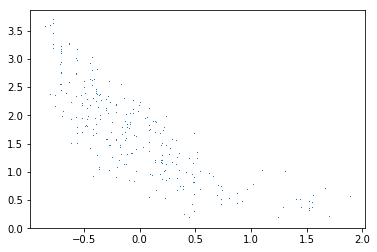

In [33]:
plt.plot(df_train['xtrain_1'].values[train_labels==blob], y_be[train_labels==blob], ',')

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
X_test[:,2]

array([-0.00131167,  0.00197778, -0.05343415,  0.00362556,  0.01544265,
        0.00108086, -0.06371704,  0.00092033,  0.00665936, -0.02617811,
        0.01005759, -0.04088189, -0.00507364,  0.02512064, -0.00962199,
       -0.00034374,  0.01153171,  0.00196792, -0.00034374,  0.00416254,
        0.00099862,  0.03918637,  0.02494683,  0.05401899, -0.04610934,
        0.02552653,  0.00189554,  0.00279136,  0.00146806,  0.00471749,
       -0.01980154, -0.01980154,  0.01468089, -0.00121428, -0.00905026,
        0.00479845, -0.02325434,  0.01544265, -0.00310064,  0.02595276,
       -0.05655501, -0.00115577,  0.00229151,  0.00178386, -0.00427099,
        0.10978252,  0.00161852,  0.00474723,  0.01145076,  0.00970955])

In [123]:
scores_knnr = []

In [124]:
for n_neighbors in range(1,100):
    X_train, X_test, Y_train, Y_test = train_test_split(df_train[['xtrain_1','ztrain_1']+avg_features+dist_features+percent_features].values[train_labels==blob], y_be[train_labels==blob], test_size=0.1, shuffle=True)
    knn = KNeighborsRegressor(n_neighbors, weights='distance')
    y_ = knn.fit(X_train, Y_train).predict(X_test)
    scores_knnr.append(rmsle(y_, Y_test))

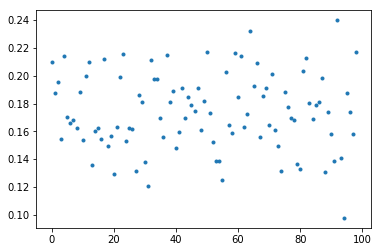

In [125]:
plt.plot(scores_knnr,'.')

In [122]:
n_neighbors = 25
X_train, X_test, Y_train, Y_test = train_test_split(df_train[['xtrain_1','ytrain_1','ztrain_1']].values[train_labels==blob], y_be[train_labels==blob], test_size=0.2, shuffle=True)

knn = KNeighborsRegressor(n_neighbors, weights='distance')
y_ = knn.fit(X_train, Y_train).predict(X_test)

trace3 = go.Scatter3d(
                        x=X_test[:,0],
                        y=X_test[:,1],
                        z=X_test[:,2],
                        mode='markers',
                        marker=dict(
                            size=5,
                            color=Y_test,                # set color to an array/list of desired values
                            colorscale='Jet',   # choose a colorscale
                            opacity=1
                            )
                        )
trace4 = go.Scatter3d(
                    x=X_test[:,0],
                    y=X_test[:,1],
                    z=X_test[:,2],
                    mode='markers',
                    marker=dict(
                        size=2,
                        color=y_,                # set color to an array/list of desired values
                        colorscale='Jet',   # choose a colorscale
                        opacity=1
                        )
                    )

data = [trace3, trace4]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)
rmsle(y_, Y_test)

0.19257189209482867

In [ ]:
rmsle(y_, Y_test)

In [ ]:
fe_be=['avg_HOMO',
 'avg_mass',
 'avg_IP',
 'percent_atom_in',
 'percent_atom_al',
 'percent_atom_ga',
 'dist_16',
 'dist_17',
 'dist_21',
 'dist_11',
 'dist_15',
 'dist_42',
 'dist_18',
 'dist_19',
 'path_20',
 'path_0',
 'path_40',
 'path_30',
 'path_49',
 'path_10',
 'angle_84',
 'angle_102',
 'angle_95',
 'angle_123',
 'angle_118',
 'angle_126',
 'angle_78',
 'angle_97',
 'angle_86',
 'angle_101',
 'angle_94',
 'angle_169',
 'angle_179',
 'dihedral_39',
 'dihedral_130',
 'dihedral_48',
 'dihedral_118',
 'dihedral_49',
 'dihedral_40',
 'dihedral_129',
 'dihedral_89',
 'dihedral_76',
 'dihedral_99',
 'dihedral_79',
 'dihedral_29',
 'dihedral_2',
 'dihedral_132',
 'dihedral_17',
 'dihedral_135',
 'dihedral_107',
 'dihedral_114',
 'A_8',
 'A_0',
 'A_2',
 'A_4',
 'A_1',
 'A_5',
 'A_7',
 'B_0',
 'B_8',
 'B_4',
 'B_2',
 'B_1',
 'B_3',
 'R_2',
 'R_1',
 'R_0',
 'r_2',
 'r_0',
 'r_1']

In [ ]:
features_be = ['lattice_vector_1_ang',
               'lattice_vector_2_ang',
               'lattice_vector_3_ang']
f = ['vol']+fe_be+features_be
X = df_train[f].values[train_labels==1]
y = np.log(y_be[train_labels==1].values.reshape((340,1)).flatten()+1)


In [ ]:
# features_be = ['lattice_vector_1_ang',
#                'lattice_vector_2_ang',
#                'lattice_vector_3_ang']
# f = ['vol',
#      'xtrain_1',
#      'ytrain_1',
#      'ztrain_1']+avg_features+features_be+percent_features+dist_features+angle_features+dihedral_features
f = ['xtrain_1','ztrain_1']#+avg_features+features_be+percent_features+dist_features+angle_features+dihedral_features
#f = features_next

X = df_train[f].values[train_labels==2]
y = np.log(y_be.values+1)[train_labels==2]


In [ ]:

svr = RandomizedSearchCV(RandomForestRegressor(criterion='mse',n_jobs=-1), cv=KFold(n_splits=5, shuffle=True, random_state=42),
                       param_distributions={
                           'n_estimators':np.linspace(200,250,10,dtype='int'),
                           'max_features':np.linspace(0.5,1.0,100, dtype='float'),
                           'max_depth':np.linspace(1,5,1,dtype='int'),
                           'min_samples_split':np.linspace(0.1,.48,100),
                           'min_samples_leaf':np.linspace(0.05,0.425,100),
                           'min_weight_fraction_leaf':np.linspace(0,0.5,100),
                           'max_leaf_nodes':np.linspace(2,5,1,dtype='int'),
                           'min_impurity_decrease':np.linspace(0,.49,1000)},
                      n_iter = 250,
                      n_jobs=-1,
                      scoring=rmsle_scorer,
                )
svr.fit(X, y)
svr.best_params_,svr.best_score_

In [ ]:
features_next

In [ ]:
features_next

In [ ]:
importances = svr.best_estimator_.feature_importances_

std = np.std([tree.feature_importances_ for tree in svr.best_estimator_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
features_next=[]
for i in range(X.shape[1]):
    print("%d. feature %s (%f)" % (i + 1, f[indices[i]], importances[indices[i]]))
    if importances[indices[i]]>0.001:
        features_next.append(f[indices[i]]) 

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
reg = linear_model.ElasticNetCV()
score = cross_val_score(reg, X, y, scoring=rmsle_scorer, cv=KFold(n_splits=5, shuffle=True, random_state=42))
score

In [ ]:
svr = RandomizedSearchCV(SVR(kernel='rbf'), cv=KFold(n_splits=5, shuffle=True, random_state=42),
                       param_distributions={
                                   "C": np.linspace(4,8,1e5),#[1e-5, 1e-4, 1e-3, 1e-1, 1e-2, 1e1],#np.linspace(0.01,0.09,1e3),# [1e-5, 1e-4, 1e-3, 1e-1, 1e-2, 1e1],
                                   "gamma":  np.linspace(0.8,1,1e4)},#np.linspace(7e-06,8.10e-06,1e3)},#[1e-5, 1e-4, 1e-3, 1e-1, 1e-7, 1e-6]},
                      n_iter = 2500,
                      n_jobs=-1,
                      scoring=rmsle_scorer)
svr.fit(X, y)
svr.best_params_,svr.best_score_

In [ ]:
#plt.hist(y_train_s[train_labels==0],bins=10)
plt.hist(np.log(y_be[train_labels==blob]+1),bins=9)
#plt.hist(y_train_s[train_labels==6],bins=10)
plt.show()

In [ ]:
#plt.hist(np.sqrt(y_be+0.5)[train_labels==1],bins=10)
#plt.hist(np.sqrt(y_be+0.5)[train_labels==2],bins=10)
plt.hist(np.sqrt(y_be+0.5)[train_labels==9],bins=10)
plt.show()

In [ ]:
from sklearn import mixture

In [ ]:
gmm = mixture.GMM(n_components=1, covariance_type='full')
gmm.fit(X)

In [ ]:
from sklearn import linear_model
from sklearn import svm
from sklearn.isotonic import IsotonicRegression
from sklearn.kernel_ridge import KernelRidge

In [ ]:
dist_features = [x for x in df_train.columns.tolist() if x.startswith('dist')]
path_features = [x for x in df_train.columns.tolist() if x.startswith('path')]
angle_features = [x for x in df_train.columns.tolist() if x.startswith('angle')]
dihedral_features = [x for x in df_train.columns.tolist() if x.startswith('dihedral')]
percent_features = [x for x in df_train.columns.tolist() if x.startswith('percent')]
avg_features = [x for x in df_train.columns.tolist() if x.startswith('avg')]
lattice_angle_features = [x for x in df_train.columns.tolist() if x.startswith('lattice_angle')]

In [ ]:
features_be = ['lattice_vector_1_ang',
               'lattice_vector_2_ang',
               'lattice_vector_3_ang']
X_be = df_train[['lattice_angle_alpha_degree',
                 'lattice_angle_gamma_degree',
                 'number_of_total_atoms',
                 'vol']
                 +avg_features
                 +features_be
                 +percent_features
                 +dist_features].values

regs_be ={}
scores_be=[]
y_train = np.sqrt(y_be+0.5)
y_train_m = y_train.max()
y_train_s = y_train/y_train_m
for i in np.unique(labels):
    #reg = svm.NuSVR(C = 100, nu=0.9)
    #reg = RandomForestRegressor(n_estimators=200, max_depth=24, n_jobs=-1)
    reg = linear_model.BayesianRidge()
    #reg = KernelRidge(alpha = 0.015)
    score = cross_val_score(reg, X_be[train_labels==i], y_train_s[train_labels==i], scoring=rmsle_scorer, cv=ShuffleSplit(n_splits= 5, test_size=.2,random_state=42))
    regs_be[i]=reg
    print(i, len(y_be[train_labels==i]), np.mean(score))
    scores_be.append(np.mean(score))

In [ ]:
y_train = np.log(y_be.values+1)
scale = StandardScaler()
y_train_s = scale.fit_transform(y_train.reshape(-1, 1))

In [ ]:
y_train

In [ ]:
features_be2 = ['percent_atom_al',
'percent_atom_in',
'percent_atom_ga']

In [ ]:
df_train['t_x']= 0.5*(np.divide((df_train['percent_atom_al']+2*df_train['percent_atom_in']),(df_train['percent_atom_al']+df_train['percent_atom_in']+2*df_train['percent_atom_ga'])))
df_train['t_y']= 0.866*(np.divide((df_train['percent_atom_al']),(df_train['percent_atom_al']+df_train['percent_atom_in']+2*df_train['percent_atom_ga'])))

In [ ]:
X_be2 = df_train[['t_x','t_y']].values


reg_be = SVR(kernel='linear', gamma=0.001, C=.1)
score = cross_val_score(reg_be, X_be2, y_be.values, scoring=rmsle_scorer, cv=ShuffleSplit(n_splits= 5, test_size=.2))
score

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [ ]:
feat_list=['lattice_angle_alpha_degree',
           'lattice_angle_gamma_degree',
           'lattice_angle_gamma_degree',
           'vol',
           'atomic_density',
           'lattice_vector_1_ang',
           'lattice_vector_2_ang',
           'lattice_vector_3_ang']+avg_features+percent_features+dist_features

In [ ]:
X = df_train[feat_list][train_labels==2]
y = np.log(df_train['bandgap_energy_ev'].values +1)[train_labels==2]
reg = linear_model.LassoCV()
score = cross_val_score(reg, X, y, scoring=rmsle_scorer, cv=ShuffleSplit(n_splits=5, test_size=.2, random_state=42))
score

In [ ]:
X_be_8 = df_train[feat_list][train_labels==5]
y_be_8 = np.log(df_train['bandgap_energy_ev'].values +1)[train_labels==5]

svr = RandomizedSearchCV(SVR(kernel='linear', gamma=0.1), cv=ShuffleSplit(n_splits=5, test_size=.2),
                       param_distributions={
                                   "C": np.linspace(0.001,0.01,1e3),#[1e-5, 1e-4, 1e-3, 1e-1, 1e-2, 1e1],#np.linspace(0.01,0.09,1e3),# [1e-5, 1e-4, 1e-3, 1e-1, 1e-2, 1e1],
                                   "gamma":  np.linspace(0.001,0.01,1e3)},#np.linspace(7e-06,8.10e-06,1e3)},#[1e-5, 1e-4, 1e-3, 1e-1, 1e-7, 1e-6]},
                      n_iter = 1500,
                      n_jobs=-1,
                      scoring=rmsle_scorer)
svr.fit(X_be_8, y_be_8)
svr.best_params_,svr.best_score_

In [ ]:
#label: 5
({'C': 0.001, 'gamma': 0.0030720720720720722}, -0.028667028195553858)
#label 8
({'C': 0.035065065065065064, 'gamma': 7.2246246246246248e-06},
 -0.02953358656902972)

In [ ]:
x = df_train['t_x'].values
y = df_train['t_y'].values
z = y_be

trace1 = go.Scatter3d(
    x=x[labels==2],
    y=y[labels==2],
    z=z[labels==2],
    mode='markers',
    marker=dict(
        size=5,
        color=y_be,
        colorscale='Jet',   # choose a colorscale
        opacity=0.5
    )
)

data = [trace1]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
x = df_train['t_x'].values
y = df_train['t_y'].values


trace1 = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        size=12,
        color=y_be,                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.5
    )
)

data = [trace1]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
cluster_label =1
x = X_be[labels==cluster_label]['lattice_vector_1_ang'].values
y = X_be[labels==cluster_label]['lattice_vector_2_ang'].values
z = X_be[labels==cluster_label]['lattice_vector_3_ang'].values


trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=y_be[labels==cluster_label],                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.5
    )
)

data = [trace1]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
X_be = df_train[['lattice_angle_alpha_degree',
                 'lattice_angle_gamma_degree',
                 'number_of_total_atoms',
                 'vol']
                 +avg_features
                 +features_be
                 +percent_features
                 +dist_features]

t = time.time()
bstmdl, grd = test(X_be[labels==2], y_be[labels==2])
print()
print('this took {}-seconds'.format(time.time()-t))